#Importing the Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Keras-Preprocessing
#!pip install pyLDAvis scikit-learn
!pip install ktrain
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from bs4 import BeautifulSoup
import nltk
from nltk.text import Text
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from PIL import Image
import ktrain
from ktrain import text
#import gensim
#import pyLDAvis.gensim_models as gensimvis
#import pyLDAvis
sns.set()
sns.set_theme(style="whitegrid")
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


#Loading IMDb Movie Review Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Dataset/IMDB_Movie_Review_Final_Train.csv',encoding="ISO-8859-1")
df2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Dataset/IMDB_Movie_Review_Final_Test.csv',encoding="ISO-8859-1")

In [ ]:
df.head(5)

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


#Exploratory Data Analysis(EDA)

In [ ]:
df.shape

(75000, 2)

In [ ]:
df2.shape

(5000, 2)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,75000.0,0.5,0.500003,0.0,0.0,0.5,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     75000 non-null  object
 1   sentiment  75000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df['sentiment'].value_counts()

0    37500
1    37500
Name: sentiment, dtype: int64

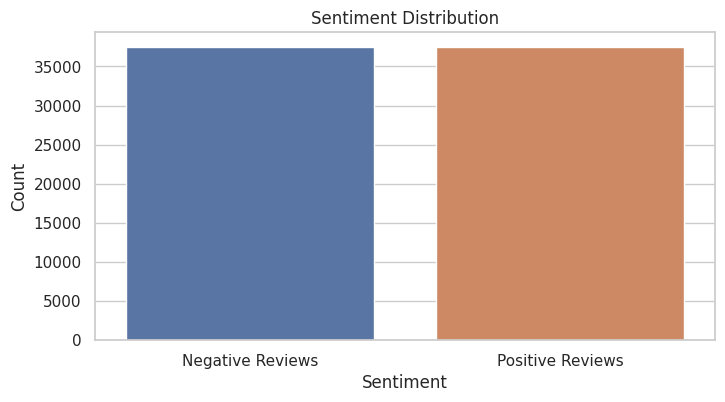

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["sentiment"])
plt.title('Sentiment Distribution')
plt.xticks([0, 1], ['Negative Reviews', 'Positive Reviews'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

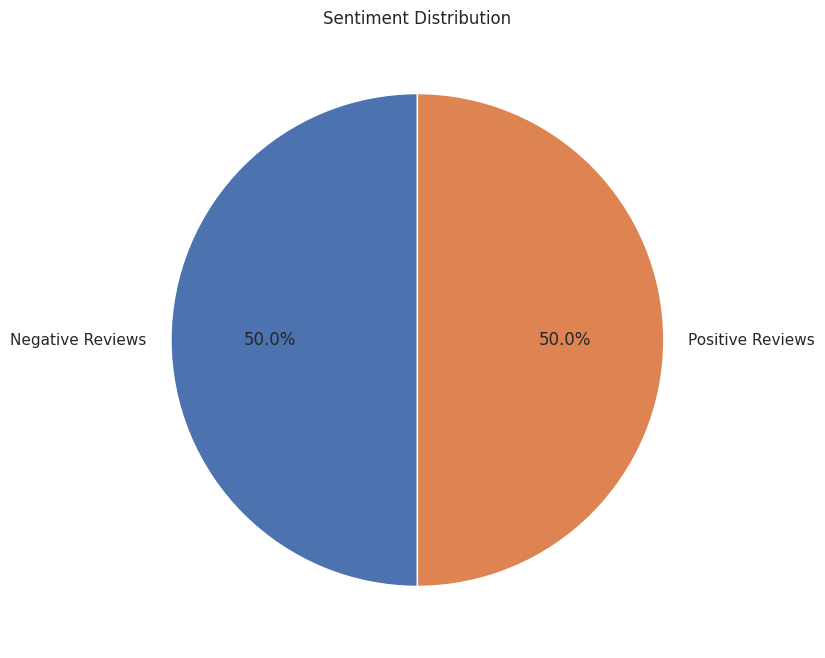

In [ ]:
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.0] * len(df['sentiment'].unique()),
    labels=['Negative Reviews', 'Positive Reviews']
)
plt.title('Sentiment Distribution')
plt.axis('off')
plt.show()

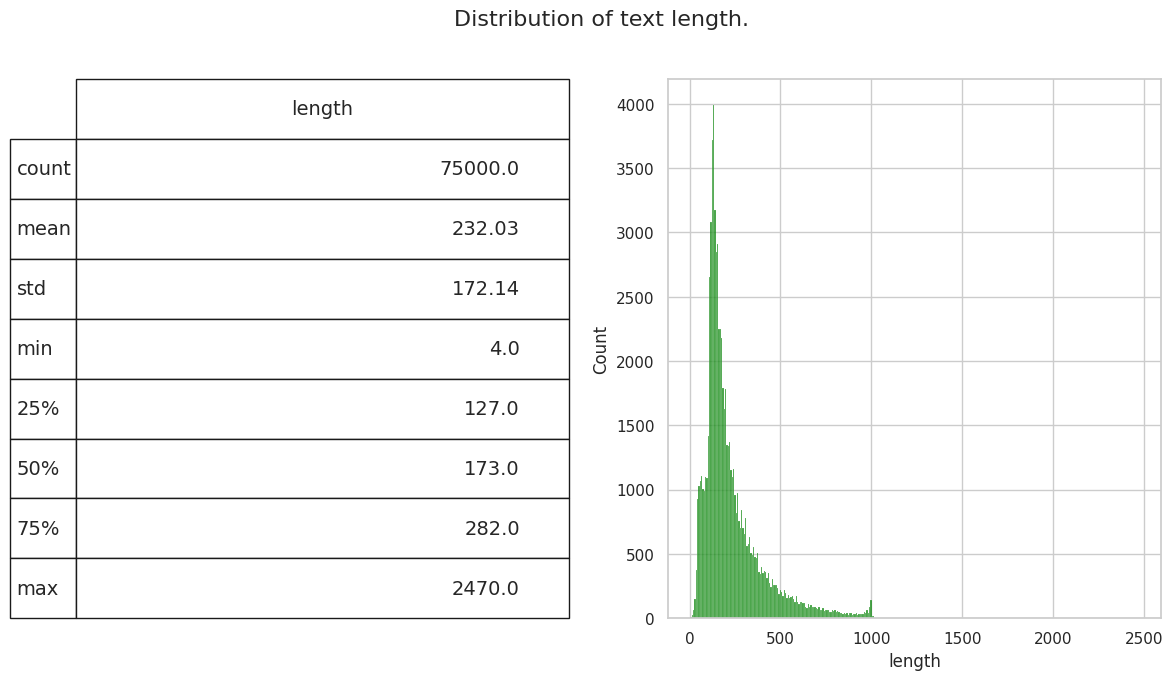

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length.', fontsize=16)

plt.show()

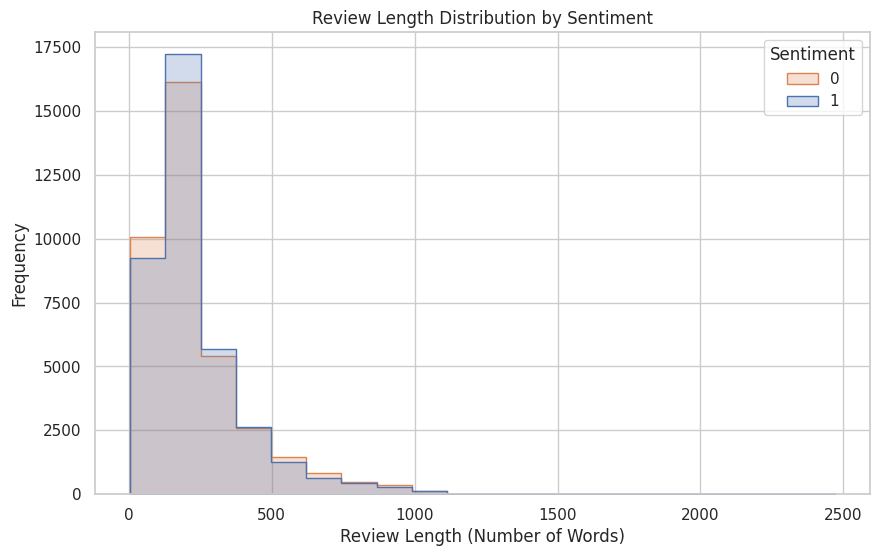

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='sentiment', bins=20, element='step')
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Frequency")

unique_sentiments = df['sentiment'].unique()
plt.legend(title="Sentiment", labels=unique_sentiments)

plt.show()

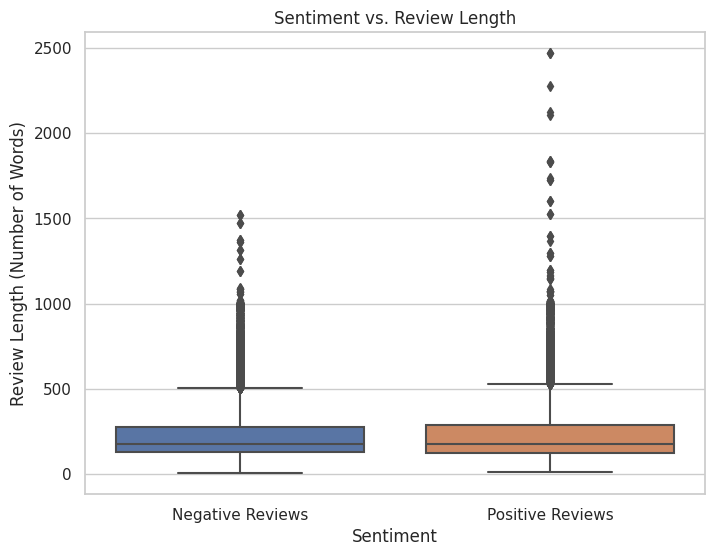

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='length', data=df)
plt.title("Sentiment vs. Review Length")
plt.xlabel("Sentiment")
plt.xticks([0, 1], ['Negative Reviews', 'Positive Reviews'])
plt.ylabel("Review Length (Number of Words)")
plt.show()

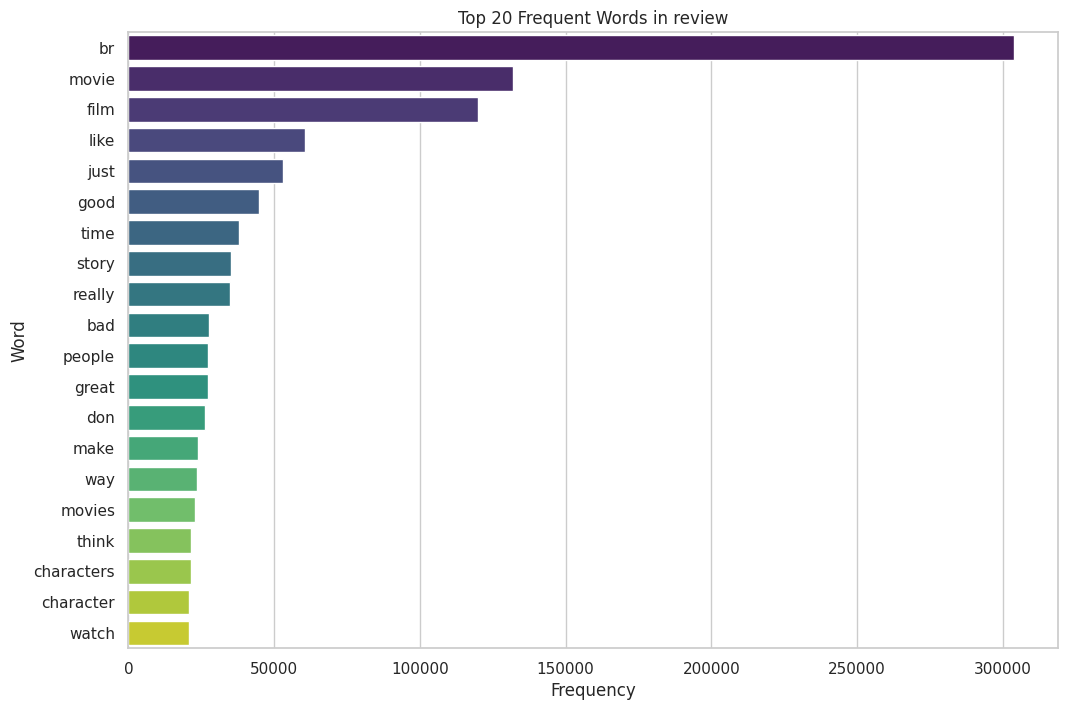

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])

word_freq = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
top_words = word_freq.transpose().sort_values(0, ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_words[0], y=top_words.index, palette="viridis")
plt.title('Top 20 Frequent Words in review')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

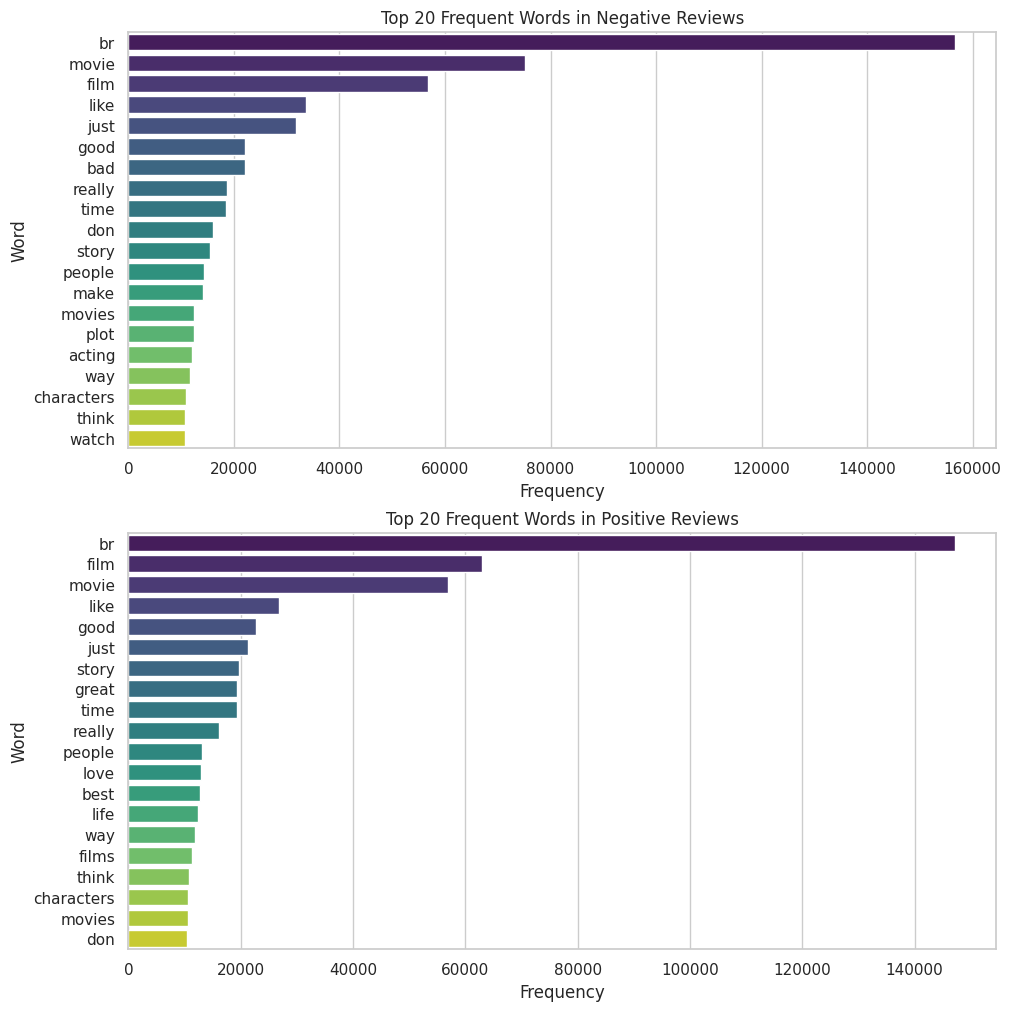

In [ ]:
vafig, axes = plt.subplots(nrows=len(df['sentiment'].unique()), ncols=1, figsize=(10, 10), constrained_layout=True)

for ax, sentiment in zip(axes, df['sentiment'].unique()):
    subset_df = df[df['sentiment'] == sentiment]

    X = vectorizer.fit_transform(subset_df['review'])
    word_freq = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
    top_words = word_freq.transpose().sort_values(0, ascending=False).head(20)

    sns.barplot(x=top_words[0], y=top_words.index, palette="viridis", ax=ax)
    ax.set_title(f'Top 20 Frequent Words in {"Negative Reviews" if sentiment == 0 else "Positive Reviews"}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')

plt.show()

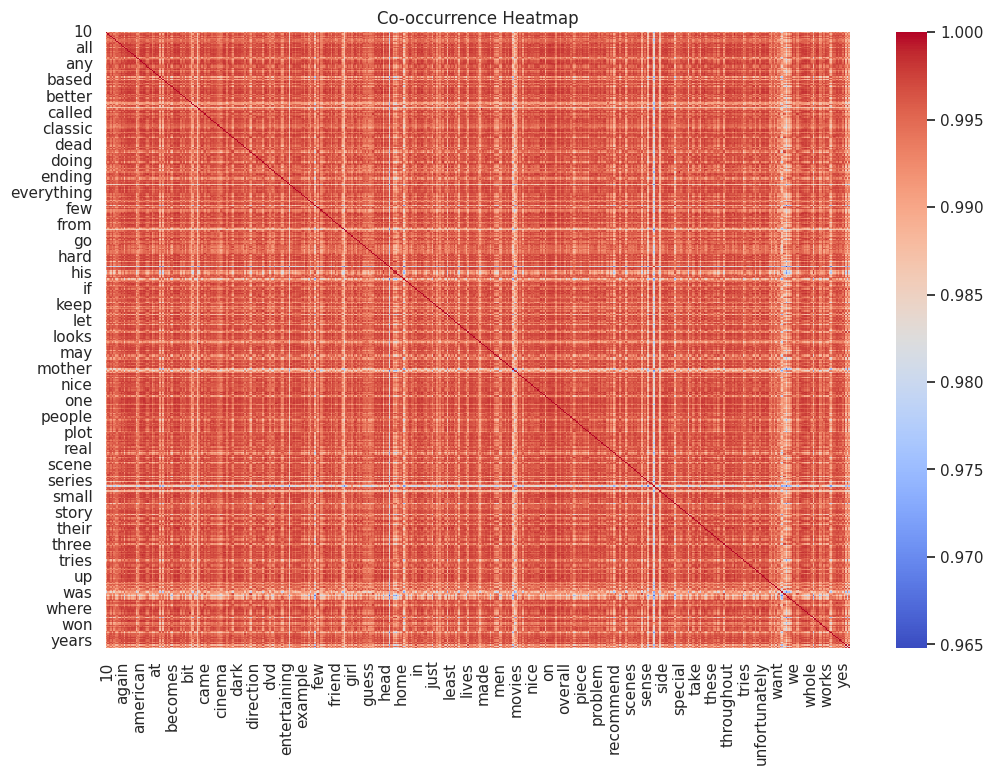

In [ ]:
vectorizer = CountVectorizer(max_features=500)
X = vectorizer.fit_transform(df['review'])

co_occurrence = (X.T * X)
co_occurrence_df = pd.DataFrame(co_occurrence.toarray(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_df.corr(), cmap='coolwarm', annot=False)
plt.title("Co-occurrence Heatmap")
plt.show()

In [ ]:
texts = [review.split() for review in df['review']]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

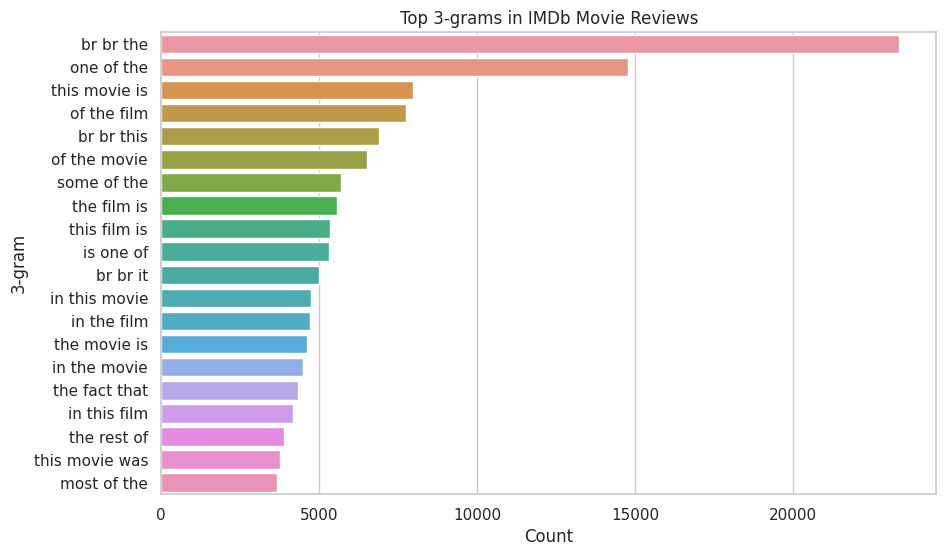

In [ ]:
vectorizer = CountVectorizer(ngram_range=(3, 3))
X_ngrams = vectorizer.fit_transform(df['review'])

ngram_counts = X_ngrams.sum(axis=0)
ngram_list = vectorizer.get_feature_names_out()
ngram_counts = ngram_counts.tolist()[0]

ngram_dict = {'ngram': ngram_list, 'count': ngram_counts}
ngram_df = pd.DataFrame(ngram_dict)

ngram_df = ngram_df.sort_values(by='count', ascending=False)
top_ngrams = ngram_df.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='ngram', data=top_ngrams)
plt.title(f"Top {(3, 3)[0]}-grams in IMDb Movie Reviews")
plt.xlabel("Count")
plt.ylabel(f"{(3, 3)[0]}-gram")
plt.show()

In [ ]:
all_reviews = ' '.join(df['review'])
tokens = word_tokenize(all_reviews)
text = Text(tokens)

word_to_plot = "bad"
text.concordance(word_to_plot, width=100)

Displaying 25 of 26734 matches:
ge play something he can really pull off like a bad actor . Nick Cage who be brilliant in a role as
tor . Nick Cage who be brilliant in a role as a bad actor . Heck nobody could do it better. < br / 
t was touted as an incredible film . Incredibly bad . Very pretentious . It would be nice if just o
.. Nothing much to tell about other sectors ... Bad script destroys everything ... not even Anupam 
etc. < br / > < br / > But `` The Prey '' is as bad as you might expect . I did n't even remember a
y is a big mess . 1980 was certainly a year for bad backwoods slasher movies . `` Friday The 13th '
 all fairness `` The Prey '' is nowhere near as bad as `` Do n't Go Into The Woods '' but it 's sti
comes to 'The Prey ' . Endless nature footage , bad acting - Aside from these elements , this is a 
stwick 's skill behind the instrument . Not too bad if I do say so myself. < br / > < br / > The la
) of slasher movie fans in the world , even the bad acting and atroc

#Text Preprocessing: Removing Punctuation, Lowercasing, Lemmatization, and Stopword Removal

In [ ]:
stop_words = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text()
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    clean_text = re.sub(r'\s+', ' ', clean_text)
    clean_text = clean_text.lower()
    words = clean_text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, "v") for word in lemmatized_words]
    filtered_words = [word for word in lemmatized_words if word not in stop_words and len(word) > 1]
    cleaned_text = " ".join(filtered_words)
    return cleaned_text


df['Processed_Reviews'] = df.review.apply(lambda x: clean_text(x))

df2['Processed_Reviews'] = df2.review.apply(lambda x: clean_text(x))

<ipython-input-66-02bbf9b66022>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-66-02bbf9b66022>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
df.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

130.17389333333333

#Machine Learning Models

##Text Vectorization and Feature Transformation using CountVectorizer and TfidfTransformer

In [ ]:
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(df['review'])
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(df2['review'])
x_test_tfidf = transformer.transform(x_test_counts)

y_train= df['sentiment']
y_test= df2['sentiment']

##Hyperparameter Tuning and Evaluation of Logistic Regression Model

In [ ]:
lr = LogisticRegression(solver='sag', max_iter=200)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [200, 300, 500],
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'max_iter': 200}
Accuracy : 99.96%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2465
           1       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



Text(91.25, 0.5, 'Actual values')

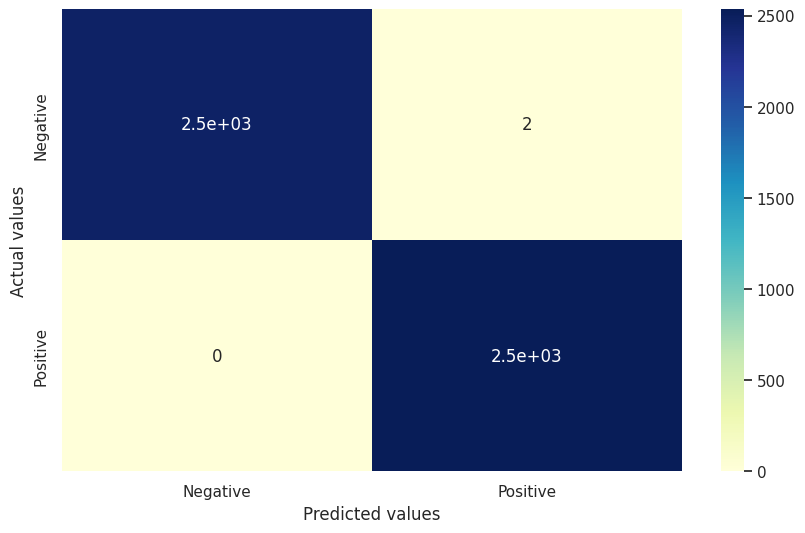

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Support Vector Classifier(SVC) Model

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 1500]
}

svc = LinearSVC()

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_svc_model = grid_search.best_estimator_

y_pred2 = best_svc_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred2) * 100
classification_rep = classification_report(y_test, y_pred2)

print(f"Accuracy with Best Hyperparameters: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 1, 'max_iter': 500}
Accuracy with Best Hyperparameters: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2465
           1       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



Text(91.25, 0.5, 'Actual values')

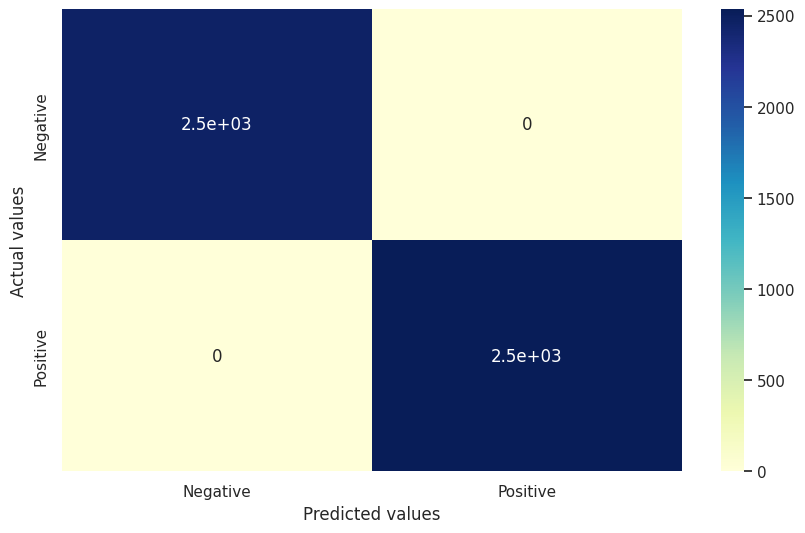

In [ ]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Random Forest Classifier Model

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred3 = best_rf_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred3) * 100
classification_rep = classification_report(y_test, y_pred3)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Accuracy : 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2465
           1       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



Text(91.25, 0.5, 'Actual values')

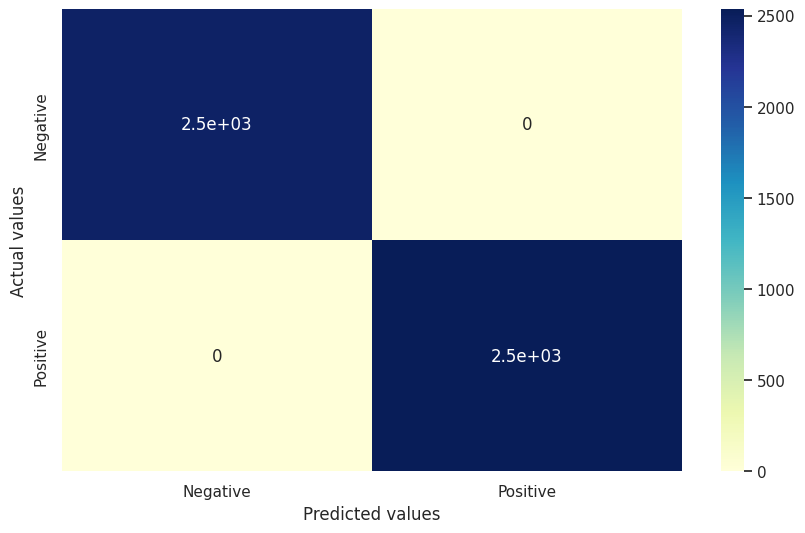

In [ ]:
cm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Multinominal Naive Bayes Classifier Model

In [ ]:
mnb = MultinomialNB()

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
}

grid_search = GridSearchCV(mnb, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_tfidf, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_mnb_model = grid_search.best_estimator_

y_pred4 = best_mnb_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred4) * 100
classification_rep = classification_report(y_test, y_pred4)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'alpha': 0.1}
Accuracy : 99.94%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2465
           1       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



Text(91.25, 0.5, 'Actual values')

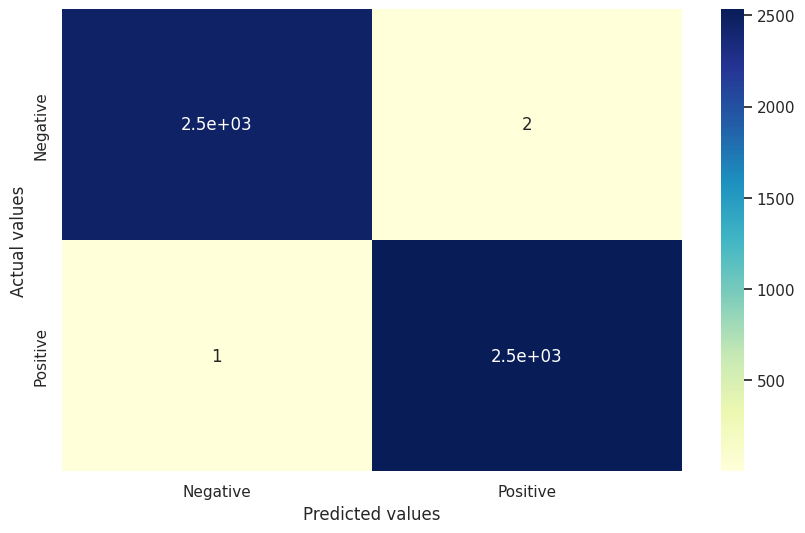

In [ ]:
cm = confusion_matrix(y_test, y_pred4)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Gradient Boosting Classifier Model

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=300, max_features='auto', max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred5) * 100
classification_rep = classification_report(y_test, y_pred5)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

      Iter       Train Loss   Remaining Time 
         1           1.3496          142.54m
         2           1.3190          144.45m
         3           1.2933          145.51m
         4           1.2711          145.86m
         5           1.2517          148.28m
         6           1.2345          150.05m
         7           1.2193          149.32m
         8           1.2049          148.44m
         9           1.1914          149.48m
        10           1.1779          148.71m
        20           1.0835          142.59m
        30           1.0188          138.31m
        40           0.9678          133.29m
        50           0.9264          127.92m
        60           0.8896          122.96m
        70           0.8600          117.58m
        80           0.8335          111.95m
        90           0.8089          106.61m
       100           0.7883          101.18m
       200           0.6471           49.82m
       300           0.5661            0.00s
Accuracy 

Text(91.25, 0.5, 'Actual values')

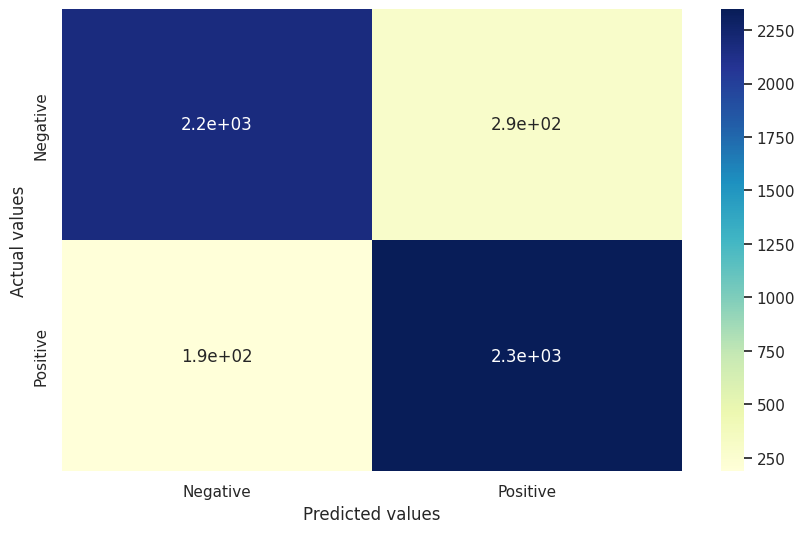

In [ ]:
cm = confusion_matrix(y_test, y_pred5)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Evaluation of Voting Classifier Model

In [ ]:
mnb = MultinomialNB(alpha=0.1)
rfc = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, class_weight='balanced')
lr = LogisticRegression(C=10, max_iter=200, n_jobs=-1)
gnb = GaussianNB()
dtc = DecisionTreeClassifier()

ec = VotingClassifier(
    estimators=[
        ('Multinomial NB', mnb),
        ('Random Forest', rfc),
        ('Logistic Regression', lr),
    ],
    voting='soft',
    weights=[1, 1, 1]
)
ec.fit(x_train_tfidf, y_train)

y_pred6 = ec.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred6) * 100
classification_rep = classification_report(y_test, y_pred6)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Accuracy : 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2465
           1       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



Text(91.25, 0.5, 'Actual values')

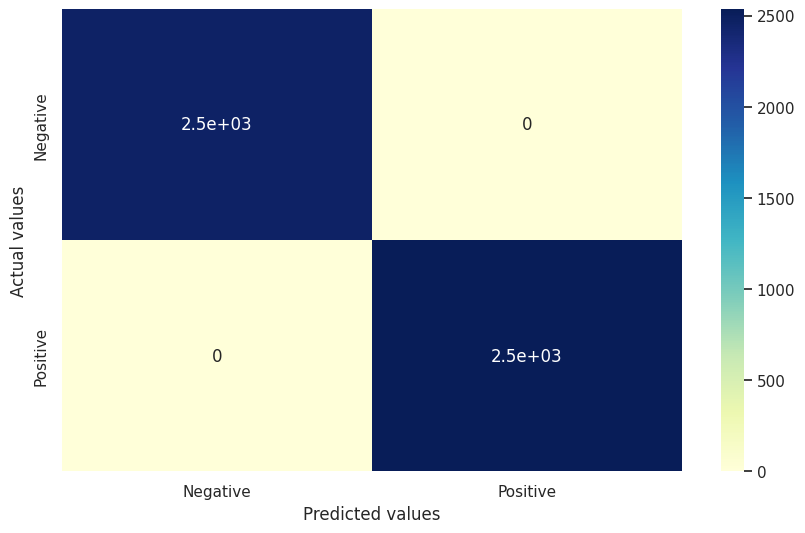

In [ ]:
cm = confusion_matrix(y_test, y_pred6)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Training and Evaluation of XGBoost Classifier Model

In [ ]:
xgb_classifier = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
)

xgb_classifier.fit(x_train_tfidf, y_train)

y_pred7 = xgb_classifier.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred7) * 100
classification_rep = classification_report(y_test, y_pred7)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Accuracy : 94.24%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2465
           1       0.93      0.96      0.94      2535

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



Text(91.25, 0.5, 'Actual values')

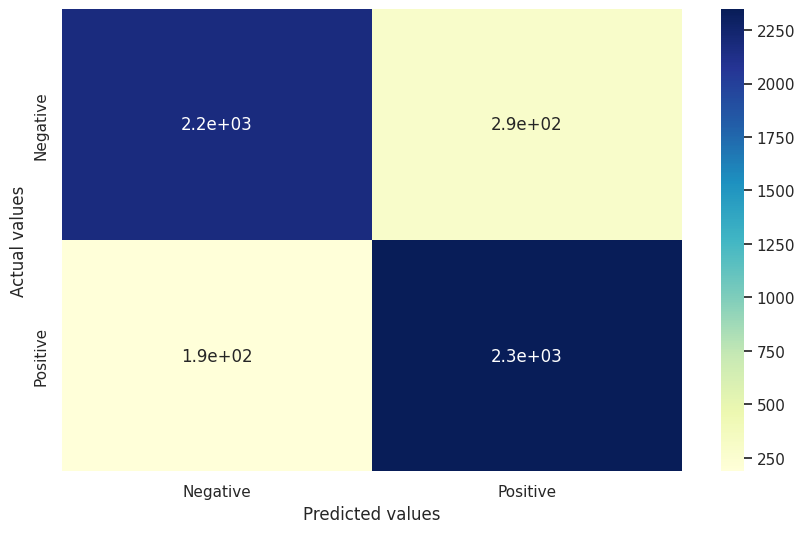

In [ ]:
cm = confusion_matrix(y_test, y_pred7)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Deep Learning Models

##Tokenization and Padding of Text Data for Neural Network Training

In [ ]:
X = df['review']
y = df['sentiment']
X2 = df2['review']
y2 = df2['sentiment']

In [ ]:
tokenizer = Tokenizer(50000)
tokenizer.fit_on_texts(X)
X_train = tokenizer.texts_to_sequences(X)
X_test = tokenizer.texts_to_sequences(X2)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

125569


In [ ]:
max_length = 150
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
y_train = to_categorical(y)
y_test = to_categorical(y2)

##LSTM Model Training and Evaluation

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_lstm.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(Dropout(0.3))
model_lstm.add(Flatten())
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(2, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 128)          16072832  
                                                                 
 lstm_8 (LSTM)               (None, 150, 128)          131584    
                                                                 
 lstm_9 (LSTM)               (None, 150, 64)           49408     
                                                                 
 dropout_4 (Dropout)         (None, 150, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 9600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1228928   
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [ ]:
history_lstm = model_lstm.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_data=(X_test,y_test))

Epoch 1/5
586/586 [==============================] - 910s 2s/step - loss: 0.2965 - accuracy: 0.8686 - val_loss: 0.1103 - val_accuracy: 0.9594
Epoch 2/5
586/586 [==============================] - 879s 1s/step - loss: 0.1120 - accuracy: 0.9601 - val_loss: 0.0581 - val_accuracy: 0.9804
Epoch 3/5
586/586 [==============================] - 906s 2s/step - loss: 0.0434 - accuracy: 0.9850 - val_loss: 0.0114 - val_accuracy: 0.9976
Epoch 4/5
586/586 [==============================] - 865s 1s/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0113 - val_accuracy: 0.9960
Epoch 5/5
586/586 [==============================] - 831s 1s/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0047 - val_accuracy: 0.9984


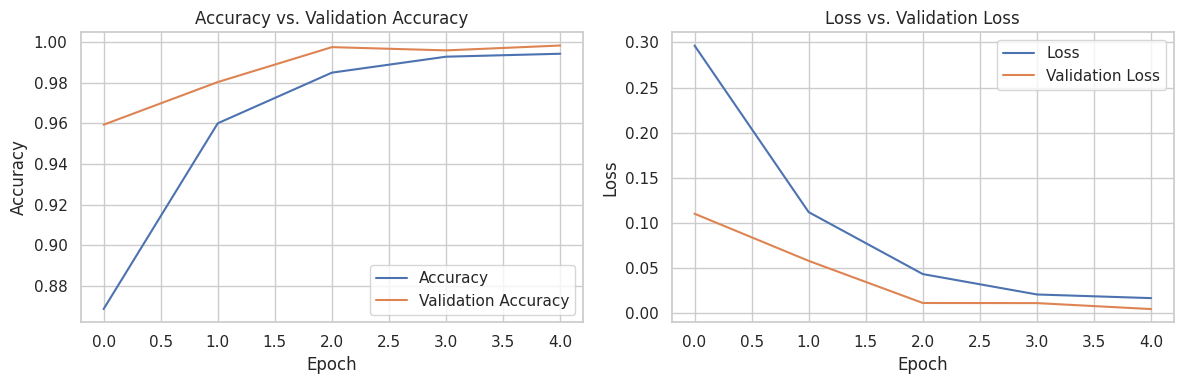

In [ ]:
accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_lstm.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.296505,0.868613,0.110269,0.9594
1,0.112025,0.960093,0.058061,0.9804
2,0.043423,0.985040,0.011416,0.9976
3,0.020846,0.992893,0.011287,0.9960
4,0.016816,0.994347,0.004687,0.9984


In [ ]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

157/157 [==============================] - 16s 100ms/step - loss: 0.0047 - accuracy: 0.9984
Test Loss: 0.0047
Test Accuracy: 99.84%


In [ ]:
y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_lstm.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=['Negative', 'Positive'])
print('Classification Report:\n', report)

157/157 [==============================] - 18s 115ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2465
    Positive       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



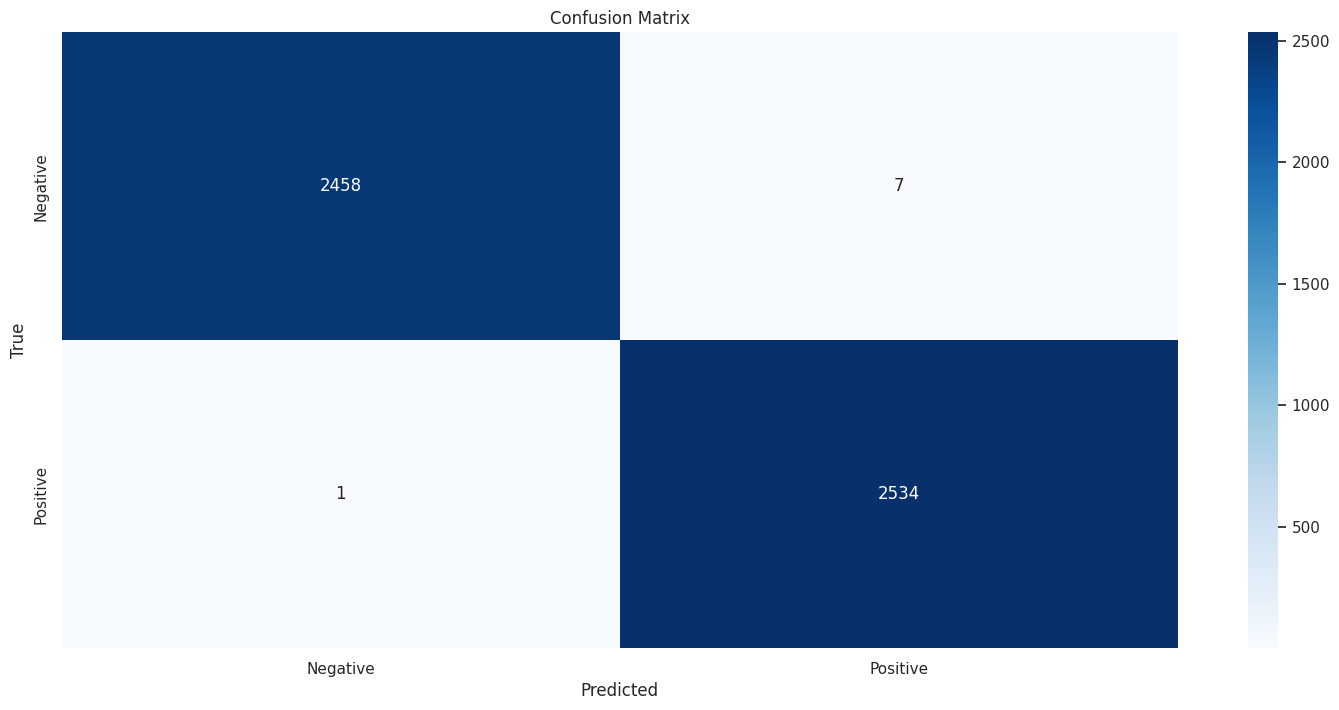

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_sentiment(text, predictor):
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=max_length)
    prediction = predictor.predict(text)
    prediction = np.argmax(prediction)

    if prediction == 0:
        print('Predicted: Negative Reviews')
    else:
        print('Predicted: Positive Reviews')

review1 = 'This movie was absolutely fantastic! The acting, plot, and visuals were all top-notch.'
review2= 'The performances by the cast were exceptional, and the cinematography was breathtaking.'
review3= 'The movie was an absolute disaster. Poor acting, terrible plot, and a waste of time.'
review4= "A complete disappointment. The special effects were the only redeeming factor, but they couldn't save the awful script."

predict_sentiment(review1, model_lstm)
predict_sentiment(review2, model_lstm)
predict_sentiment(review3, model_lstm)
predict_sentiment(review4, model_lstm)

1/1 [==============================] - 0s 176ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 153ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 151ms/step
Predicted: Negative Reviews
1/1 [==============================] - 0s 213ms/step
Predicted: Negative Reviews


##GRU Model Training and Evaluation

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_gru.add(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_gru.add(GRU(64, dropout=0.3))
model_gru.add(Dropout(0.3))
model_gru.add(Flatten())
model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(2, activation='softmax'))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          16072832  
                                                                 
 gru (GRU)                   (None, 150, 128)          99072     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
history_gru = model_gru.fit(X_train, y_train, epochs=5, batch_size=128,validation_data=(X_test,y_test))

Epoch 1/5
586/586 [==============================] - 504s 841ms/step - loss: 0.3297 - accuracy: 0.8520 - val_loss: 0.1281 - val_accuracy: 0.9580
Epoch 2/5
586/586 [==============================] - 411s 702ms/step - loss: 0.1384 - accuracy: 0.9514 - val_loss: 0.0556 - val_accuracy: 0.9836
Epoch 3/5
586/586 [==============================] - 403s 687ms/step - loss: 0.0662 - accuracy: 0.9782 - val_loss: 0.0232 - val_accuracy: 0.9946
Epoch 4/5
586/586 [==============================] - 403s 686ms/step - loss: 0.0381 - accuracy: 0.9876 - val_loss: 0.0158 - val_accuracy: 0.9952
Epoch 5/5
586/586 [==============================] - 402s 686ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0084 - val_accuracy: 0.9976


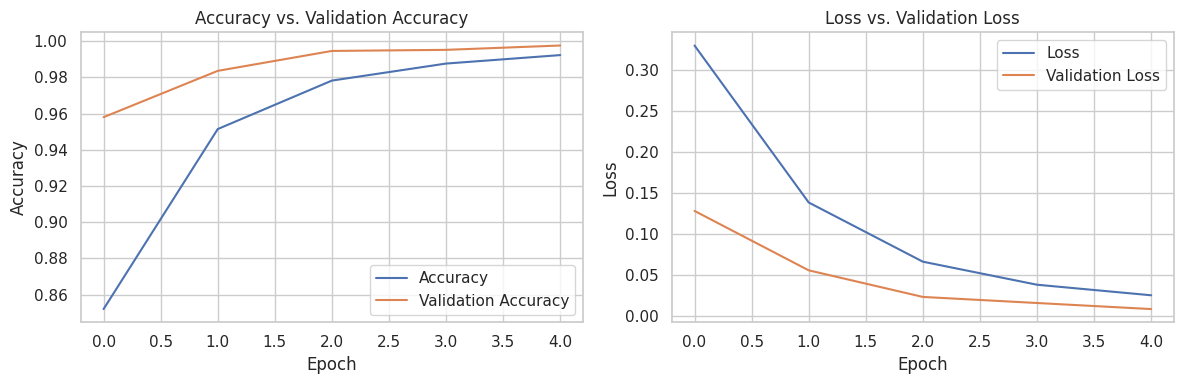

In [ ]:
accuracy = history_gru.history['accuracy']
val_accuracy = history_gru.history['val_accuracy']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_gru.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.329734,0.851987,0.128051,0.9580
1,0.138350,0.951440,0.055612,0.9836
2,0.066155,0.978227,0.023176,0.9946
3,0.038056,0.987627,0.015768,0.9952
4,0.025192,0.992307,0.008372,0.9976


In [ ]:
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

157/157 [==============================] - 12s 79ms/step - loss: 0.0084 - accuracy: 0.9976
Test Loss: 0.0084
Test Accuracy: 99.76%


In [ ]:
y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_gru.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=['Negative', 'Positive'])
print('Classification Report:\n', report)

157/157 [==============================] - 21s 122ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2465
    Positive       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



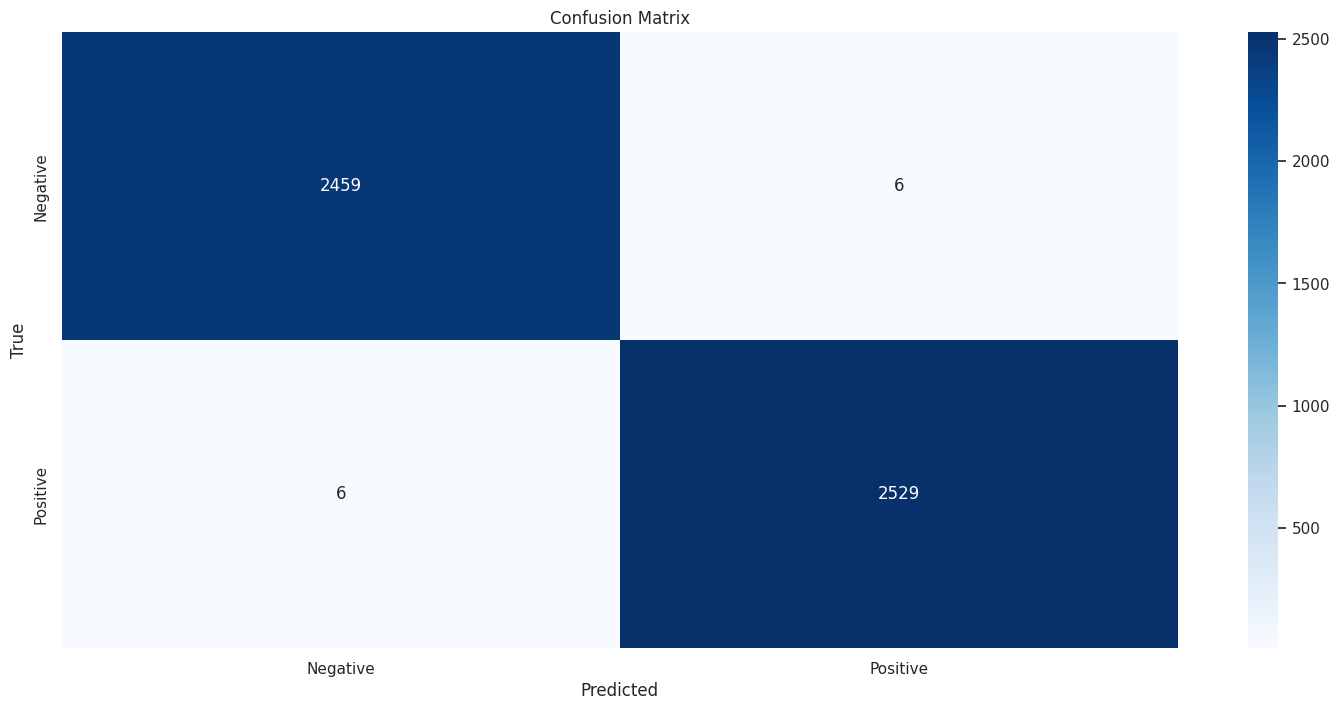

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_sentiment(text, predictor):
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=max_length)
    prediction = predictor.predict(text)
    prediction = np.argmax(prediction)

    if prediction == 0:
        print('Predicted: Negative Reviews')
    else:
        print('Predicted: Positive Reviews')

review1 = 'This movie was absolutely fantastic! The acting, plot, and visuals were all top-notch.'
review2= 'The performances by the cast were exceptional, and the cinematography was breathtaking.'
review3= 'The movie was an absolute disaster. Poor acting, terrible plot, and a waste of time.'
review4= "A complete disappointment. The special effects were the only redeeming factor, but they couldn't save the awful script."

predict_sentiment(review1, model_gru)
predict_sentiment(review2, model_gru)
predict_sentiment(review3, model_gru)
predict_sentiment(review4, model_gru)

1/1 [==============================] - 0s 92ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 131ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 119ms/step
Predicted: Negative Reviews
1/1 [==============================] - 0s 90ms/step
Predicted: Negative Reviews


##CNN Model Training and Evaluation

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_cnn.add(Conv1D(64, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(2, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 128)          16072832  
                                                                 
 conv1d_2 (Conv1D)           (None, 149, 64)           16448     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 74, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 73, 128)           16512     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 36, 128)           0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)             

In [ ]:
history_cnn= model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
586/586 [==============================] - 121s 189ms/step - loss: 0.3067 - accuracy: 0.8585 - val_loss: 0.0988 - val_accuracy: 0.9704
Epoch 2/5
586/586 [==============================] - 35s 60ms/step - loss: 0.0969 - accuracy: 0.9667 - val_loss: 0.0262 - val_accuracy: 0.9936
Epoch 3/5
586/586 [==============================] - 14s 23ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 4/5
586/586 [==============================] - 12s 21ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0045 - val_accuracy: 0.9984
Epoch 5/5
586/586 [==============================] - 10s 16ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.0023 - val_accuracy: 0.9992


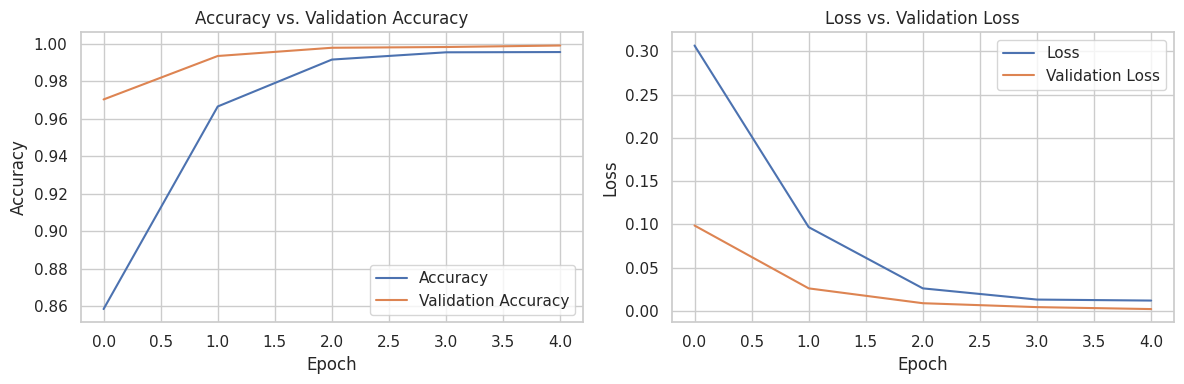

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_cnn.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.306691,0.858467,0.098789,0.9704
1,0.096915,0.966653,0.026185,0.9936
2,0.026195,0.991693,0.009042,0.9980
3,0.013250,0.995573,0.004536,0.9984
4,0.012107,0.995707,0.002280,0.9992


In [ ]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

157/157 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9992
Test Loss: 0.0023
Test Accuracy: 99.92%


In [ ]:
y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=['Negative', 'Positive'])
print('Classification Report:\n', report)

157/157 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2465
    Positive       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



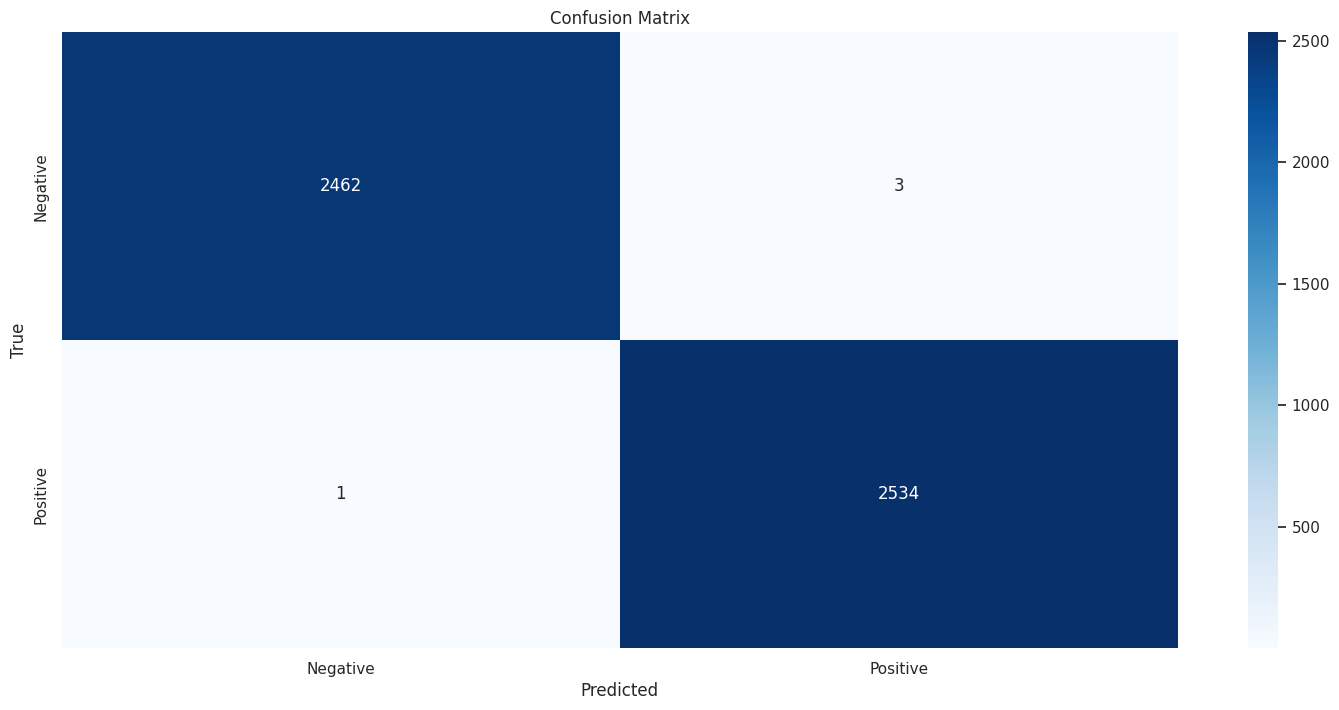

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_sentiment(text, predictor):
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=max_length)
    prediction = predictor.predict(text)
    prediction = np.argmax(prediction)

    if prediction == 0:
        print('Predicted: Negative Reviews')
    else:
        print('Predicted: Positive Reviews')

review1 = 'This movie was absolutely fantastic! The acting, plot, and visuals were all top-notch.'
review2= 'The performances by the cast were exceptional, and the cinematography was breathtaking.'
review3= 'The movie was an absolute disaster. Poor acting, terrible plot, and a waste of time.'
review4= "A complete disappointment. The special effects were the only redeeming factor, but they couldn't save the awful script."

predict_sentiment(review1, model_cnn)
predict_sentiment(review2, model_cnn)
predict_sentiment(review3, model_cnn)
predict_sentiment(review4, model_cnn)

1/1 [==============================] - 0s 193ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 18ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 22ms/step
Predicted: Negative Reviews
1/1 [==============================] - 0s 19ms/step
Predicted: Negative Reviews


##Hybrid Model Training and Evaluation

In [ ]:
model_hb = Sequential()
model_hb.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_hb.add(Conv1D(128, 2, activation='relu'))
model_hb.add(MaxPooling1D(2))
model_hb.add(Conv1D(64, 2, activation='relu'))
model_hb.add(MaxPooling1D(2))
model_hb.add(LSTM(64, dropout=0.2))
model_hb.add(Flatten())
model_hb.add(Dense(128, activation='relu'))
model_hb.add(Dropout(0.3))
model_hb.add(Dense(2, activation='softmax'))

model_hb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_hb.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 128)          16072832  
                                                                 
 conv1d_6 (Conv1D)           (None, 149, 128)          32896     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 74, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 73, 64)            16448     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 36, 64)            0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 64)               

In [ ]:
history_hb= model_hb.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
586/586 [==============================] - 67s 106ms/step - loss: 0.3130 - accuracy: 0.8582 - val_loss: 0.1151 - val_accuracy: 0.9650
Epoch 2/5
586/586 [==============================] - 26s 45ms/step - loss: 0.1121 - accuracy: 0.9619 - val_loss: 0.0415 - val_accuracy: 0.9878
Epoch 3/5
586/586 [==============================] - 20s 33ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0153 - val_accuracy: 0.9960
Epoch 4/5
586/586 [==============================] - 11s 19ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0062 - val_accuracy: 0.9982
Epoch 5/5
586/586 [==============================] - 11s 19ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0062 - val_accuracy: 0.9980


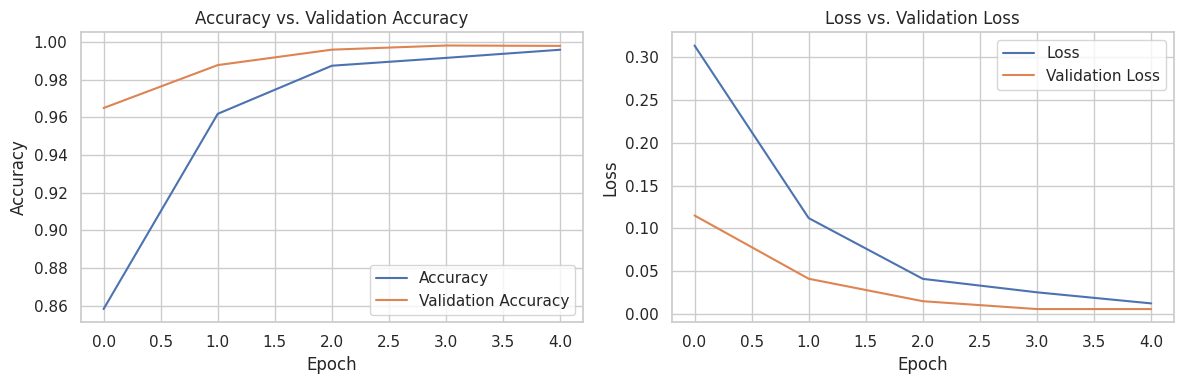

In [ ]:
accuracy = history_hb.history['accuracy']
val_accuracy = history_hb.history['val_accuracy']
loss = history_hb.history['loss']
val_loss = history_hb.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_hb.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.313023,0.858213,0.115131,0.9650
1,0.112084,0.961920,0.041462,0.9878
2,0.041330,0.987467,0.015330,0.9960
3,0.025668,0.991627,0.006171,0.9982
4,0.012778,0.995960,0.006163,0.9980


In [ ]:
loss, accuracy = model_hb.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

157/157 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 0.9980
Test Loss: 0.0062
Test Accuracy: 99.80%


In [ ]:
y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_hb.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=['Negative', 'Positive'])
print('Classification Report:\n', report)

157/157 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2465
    Positive       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



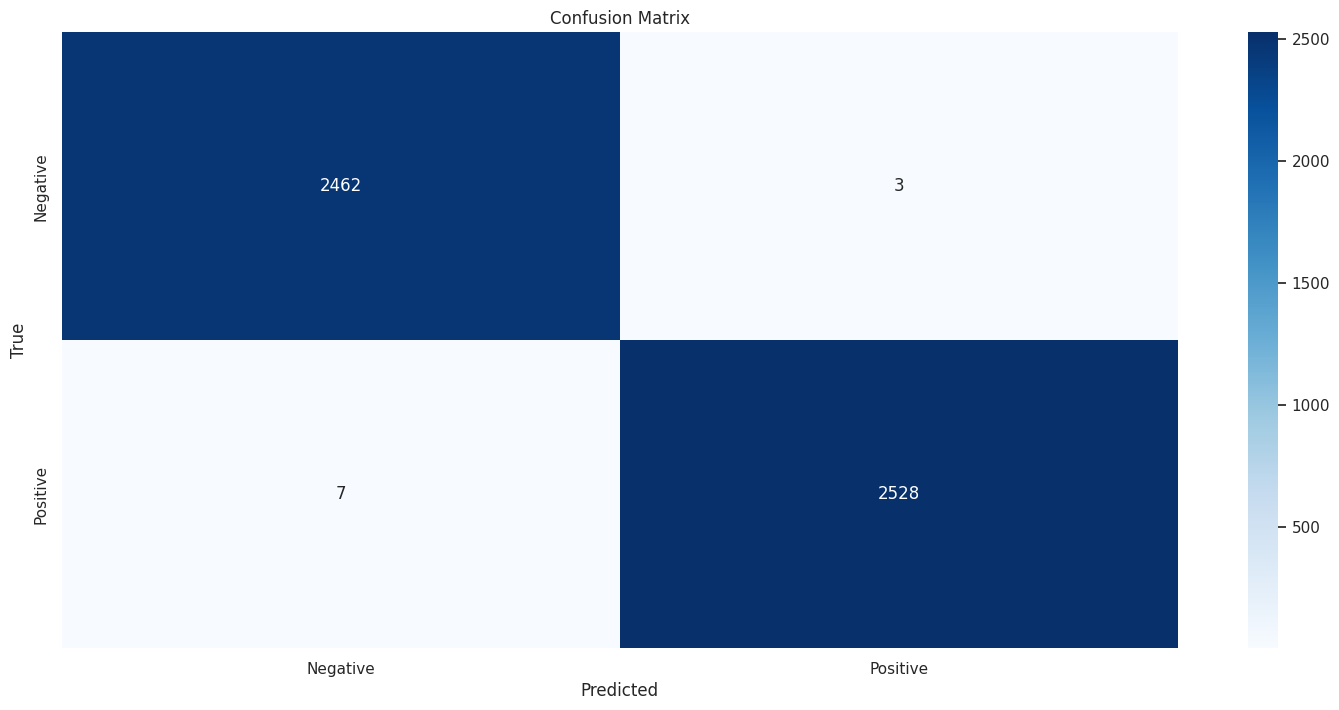

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_sentiment(text, predictor):
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=max_length)
    prediction = predictor.predict(text)
    prediction = np.argmax(prediction)

    if prediction == 0:
        print('Predicted: Negative Reviews')
    else:
        print('Predicted: Positive Reviews')

review1 = 'This movie was absolutely fantastic! The acting, plot, and visuals were all top-notch.'
review2= 'The performances by the cast were exceptional, and the cinematography was breathtaking.'
review3= 'The movie was an absolute disaster. Poor acting, terrible plot, and a waste of time.'
review4= "A complete disappointment. The special effects were the only redeeming factor, but they couldn't save the awful script."

predict_sentiment(review1, model_hb)
predict_sentiment(review2, model_hb)
predict_sentiment(review3, model_hb)
predict_sentiment(review4, model_hb)

1/1 [==============================] - 0s 97ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 18ms/step
Predicted: Positive Reviews
1/1 [==============================] - 0s 18ms/step
Predicted: Negative Reviews
1/1 [==============================] - 0s 25ms/step
Predicted: Negative Reviews


##Fine-Tuning BERT for Movie Reviews Classification

In [ ]:
X_train = df['review'].tolist()
X_test = df2['review'].tolist()
y_train = df['sentiment'].tolist()
y_test = df2['sentiment'].tolist()

In [ ]:
class_names = [0, 1]

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=140,
                                                                       max_features=10000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 140


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=32)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
2344/2344 [==============================] - 2374s 1s/step - loss: 0.2980 - accuracy: 0.8702 - val_loss: 0.1682 - val_accuracy: 0.9374
Epoch 2/3
2344/2344 [==============================] - 2340s 998ms/step - loss: 0.1631 - accuracy: 0.9390 - val_loss: 0.0485 - val_accuracy: 0.9886
Epoch 3/3
2344/2344 [==============================] - 2373s 1s/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0170 - val_accuracy: 0.9964


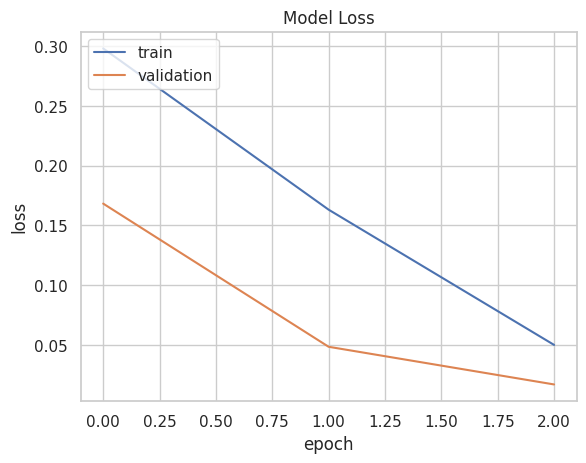

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

157/157 [==============================] - 54s 317ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2465
           1       1.00      1.00      1.00      2535

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



array([[2454,   11],
       [   7, 2528]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
def predict_sentiment(text, predictor):
    prediction = predictor.predict(text)

    if prediction == 0:
        print('Predicted: Negative Reviews')
    else:
        print('Predicted: Positive Reviews')

review1 = 'This movie was absolutely fantastic! The acting, plot, and visuals were all top-notch.'
review2= 'The performances by the cast were exceptional, and the cinematography was breathtaking.'
review3= 'The movie was an absolute disaster. Poor acting, terrible plot, and a waste of time.'
review4= "A complete disappointment. The special effects were the only redeeming factor, but they couldn't save the awful script."

predict_sentiment(review1, predictor)
predict_sentiment(review2, predictor)
predict_sentiment(review3, predictor)
predict_sentiment(review4, predictor)

Predicted: Positive Reviews
Predicted: Positive Reviews
Predicted: Negative Reviews
Predicted: Negative Reviews
